In [163]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tqdm import tqdm
import sympy as sp
from scipy.optimize import minimize

from sympy.abc import x,y,z,a,b,c,d

## Optimización

2.

In [164]:
x, y, z, l = sp.symbols('x y z l')

f = x**2 + y**2 + z**2 - 2*z + 1
g = 2*x - 4*y + 5*z - 2

ec1 = sp.diff(f, x) - l * sp.diff(g, x)
ec2 = sp.diff(f, y) - l * sp.diff(g, y)
ec3 = sp.diff(f, z) - l * sp.diff(g, z)

sol = sp.solve([ec1, ec2, ec3, g], (x, y, z, l))
val_min = f.subs({x: sol[x], y: sol[y], z: sol[z]})

print(val_min)

1/5


3.

In [165]:
def f_obj(var):
    x, y, z = var
    return -x * y * z

In [166]:
def f_restr(var):
    x, y, z = var
    return x * y + 2 * y * z + 2 * x * z - 12

In [167]:
v0 = [1, 1, 1]
restric = {'type': 'eq', 'fun': f_restr}

In [168]:
resp = minimize(f_obj, v0, constraints=restric)

In [169]:
print(-resp.fun)

4.000000340488772


In [170]:
print(resp.x)

[1.99999992 1.99999998 1.00000013]


Generales de Probabilidad

4.

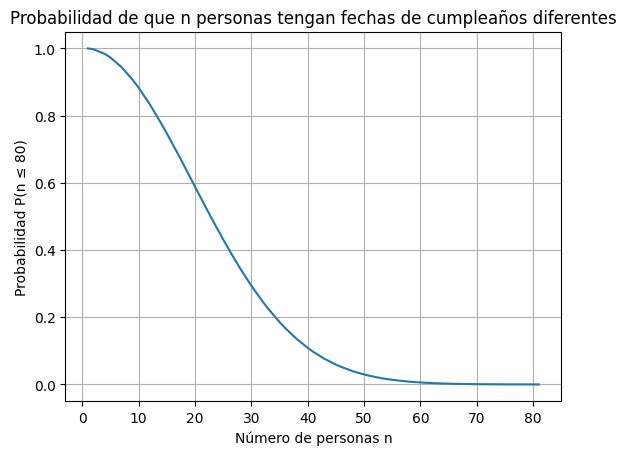

In [171]:
def prob_cumple(n):
    prob = 1
    for i in range(1, n+1):
        prob *= (365-i+1)/365
    return prob

x_ = np.linspace(1,81, dtype=int)
y_ = []

for i in x_:
    y_.append(prob_cumple(i))
    


plt.plot(x_, y_)
plt.xlabel('Número de personas n')
plt.ylabel('Probabilidad P(n ≤ 80)')
plt.title('Probabilidad de que n personas tengan fechas de cumpleaños diferentes')
plt.grid(True)
plt.show()


Distribuciones continuas de probabilidad

a)

In [172]:
fun = (2/3)*(x+2*y)

In [173]:
I1 = sp.integrate(fun, (y, 0, 1))
sp.simplify(sp.integrate(I1, (x, 0,1)))

1.00000000000000

b)

In [174]:
g = sp.integrate(fun, (y, 0,1))
g

0.666666666666667*x + 0.666666666666667

In [175]:
h = sp.integrate(fun, (x, 0, 1))
h

1.33333333333333*y + 0.333333333333333

c)

In [176]:
E_x = sp. integrate(fun*x, (x,0,1), (y,0,1))
E_x

0.555555555555556

d)

In [177]:
E_y = sp. integrate(fun*y, (x,0,1), (y,0,1))
E_y

0.611111111111111

e)

In [178]:
E_xy = c

In [179]:
E_xy - E_x * E_y

c - 0.339506172839506

f)

In [180]:
new = (x-E_x)*(y-E_y)
new

(x - 0.555555555555556)*(y - 0.611111111111111)

In [181]:
sp. integrate(fun*new, (x,0,1), (y,0,1))

-0.00617283950617284

g)

In [182]:
f

x**2 + y**2 + z**2 - 2*z + 1

In [183]:
sp.simplify(g*h)

0.666666666666667*(x + 1)*(1.33333333333333*y + 0.333333333333333)

$f(x,y)$ $\neq$ $g(x)h(y)$ por tanto no son independientes 

In [184]:
def GetSample(N = int(1e4), ncoins = 4, Weights=None):
    
    Sample = np.zeros((N,ncoins))
    
    Events = [-1,1]
    
    for i in range(N):
        
        if Weights == None:
            Exp = np.random.choice(Events,ncoins)
            
       # print(Exp)
        Sample[i] = Exp
        
    return Sample

In [185]:
N = 100000
Sample = GetSample()
Sample

array([[-1., -1.,  1., -1.],
       [-1.,  1., -1.,  1.],
       [-1.,  1., -1., -1.],
       ...,
       [ 1., -1., -1.,  1.],
       [-1.,  1., -1.,  1.],
       [-1., -1., -1.,  1.]])

In [186]:
count = 0

for i in Sample:
    if np.count_nonzero(i == 1)==2 and np.count_nonzero(i == -1)==2:
        count+=1
        
count/N

0.03698

In [187]:
3/8

0.375